First add the data functions to the path

In [1]:
import sys
import numpy as np
import pandas as pd
import copy
from netCDF4 import Dataset
from pathlib import Path
from datetime import datetime
notebook_dir = !pwd # Replace with !echo %cd% if using windows
library_dir = Path(notebook_dir[0]).parent.absolute()
sys.path.append(str(library_dir))
data_raw_path = library_dir / 'data' / 'raw'

from src.data.adcp_mission_analysis import adcp_import_data, add_dive_averages, read_glider_nc
#from src.data.beam_mapping import beam2enu, beam_from_center, caltran

Use better plotting defaults

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
style_path = library_dir / 'src' / 'visualization' / 'presentation.mplstyle'
style.use(str(style_path))

Get an overview of the dataset

In [3]:
overview, mission_dict = adcp_import_data(data_raw_path)
overview

/home/callum/anaconda3/envs/science/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/home/callum/Documents/adcp-glider/src/data/adcp_mission_analysis.py:374: RuntimeWarning: Mean of empty slice
  vel_referenced = vel - np.tile(np.nanmean(vel,0) - ref_vel,(len(bin_centers),1))


,file_path,dive_limb,averaging_interval,powerusage_mW,mem_usage_MB_per_hour,cell_size,measurement_interval,num_cells,num_pings,blank_dist,vert_direction
0001a,/home/callum/Documents/adcp-glider/data/raw/cp...,a,1,184.039993,0.061,2.0,15,15,4,0.3,Descent
0001b,/home/callum/Documents/adcp-glider/data/raw/cp...,b,1,184.039993,0.061,2.0,15,15,4,0.3,Ascent
0002a,/home/callum/Documents/adcp-glider/data/raw/cp...,a,1,184.039993,0.061,2.0,15,15,4,0.3,Descent
0002b,/home/callum/Documents/adcp-glider/data/raw/cp...,b,1,184.039993,0.061,2.0,15,15,4,0.3,Ascent
0003a,/home/callum/Documents/adcp-glider/data/raw/cp...,a,1,184.039993,0.061,2.0,15,15,4,0.3,Descent
...,...,...,...,...,...,...,...,...,...,...,...
0153b,/home/callum/Documents/adcp-glider/data/raw/cp...,b,1,184.039993,0.061,2.0,15,15,4,0.3,Ascent
0154a,/home/callum/Documents/adcp-glider/data/raw/cp...,a,1,184.039993,0.061,2.0,15,15,4,0.3,Descent
0154b,/home/callum/Documents/adcp-glider/data/raw/cp...,b,1,184.039993,0.061,2.0,15,15,4,0.3,Ascent
0155a,/home/callum/Documents/adcp-glider/data/raw/cp...,a,1,184.039993,0.061,2.0,15,15,4,0.3,Descent


Add beam attributes. These are taken from the fifth cell (11.3 m from the glider on default settings) and averaged over each ascent/descent profile

In [4]:
beam_attrs, adcp_df = add_dive_averages(overview, mission_dict)
beam_attrs
# overview.join(beam_attrs)

,cor_beam_1,cor_beam_2,cor_beam_3,cor_beam_4,amp_beam_1,amp_beam_2,amp_beam_3,amp_beam_4,beam_miss,pitch,roll,heading,good_angle_5,good_angle_all,good_cor_5,good_cor_all
0001a,NaN,20.106383,16.425532,17.212766,NaN,29.670213,29.042553,29.351064,2.697399,-42.630852,4.440851,235.983398,6.382979,6.382979,16.879433,13.049645
0001b,46.821429,48.857143,NaN,46.321429,33.696429,33.294643,NaN,32.857143,1.875847,-12.929286,4.590000,184.708572,32.142857,5.357143,47.857143,36.428571
0002a,NaN,63.545455,62.800000,62.709091,NaN,34.881818,34.563636,34.345455,1.607731,-29.559093,5.614909,115.971268,40.000000,38.181818,66.545455,48.404040
0002b,88.183333,87.666667,NaN,86.350000,37.816667,37.258333,NaN,36.741667,0.898507,16.158834,5.542000,134.029495,60.000000,48.333333,92.555556,66.777778
0003a,NaN,73.845679,75.907407,73.629630,NaN,33.243827,33.734568,33.046296,0.821654,-16.900063,4.671482,115.131355,54.938272,52.469136,87.283951,52.592593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0153b,96.581395,96.069767,NaN,95.697674,42.767442,42.116279,NaN,41.523256,0.777380,25.423719,2.500698,106.601860,83.720930,0.000000,99.379845,84.702842
0154a,NaN,92.705882,93.235294,94.705882,NaN,39.029412,40.470588,39.705882,1.549429,-26.010000,3.985883,35.480000,47.058824,5.882353,99.215686,74.248366
0154b,95.785714,95.142857,NaN,95.142857,41.714286,41.000000,NaN,40.642857,0.983536,24.104288,4.052857,97.740715,64.285714,0.000000,99.523810,82.222222
0155a,NaN,93.888889,91.925926,93.592593,NaN,39.648148,40.092593,39.000000,1.377177,-26.317038,4.590370,180.342194,33.333333,0.000000,99.506173,76.131687


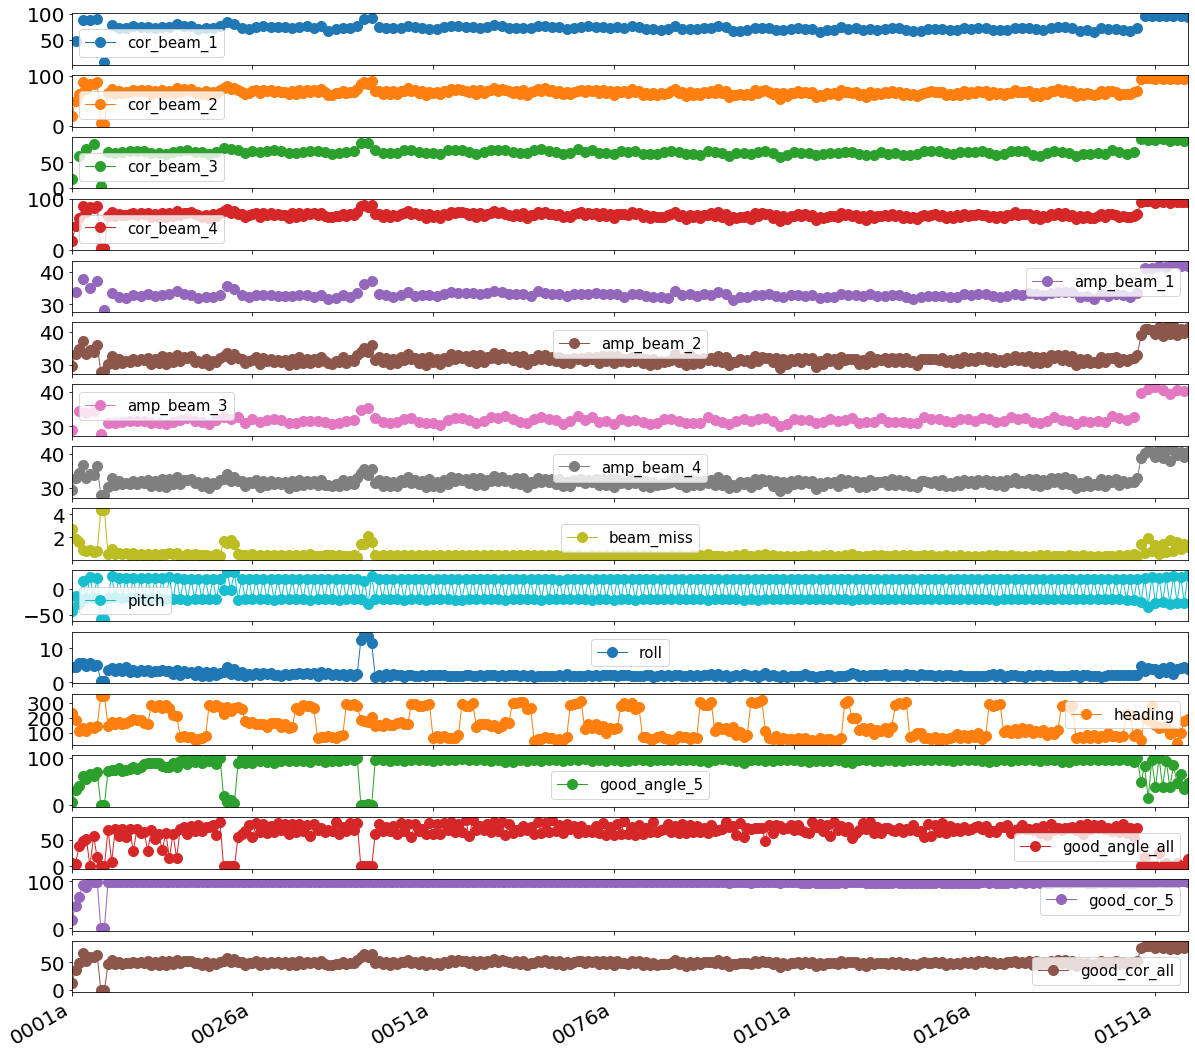

In [5]:
beam_attrs.plot(subplots=True,figsize=(20,20),marker='o');

See which variables are correlated between the dive limbs

In [6]:
beam_attrs.corr()

,cor_beam_1,cor_beam_2,cor_beam_3,cor_beam_4,amp_beam_1,amp_beam_2,amp_beam_3,amp_beam_4,beam_miss,pitch,roll,heading,good_angle_5,good_angle_all,good_cor_5,good_cor_all
cor_beam_1,1.000000,0.988481,NaN,0.990979,0.791131,0.762066,NaN,0.776933,-0.267863,0.766754,0.435990,-0.001795,-0.047118,-0.330501,0.702080,0.940128
cor_beam_2,0.988481,1.000000,0.980648,0.992339,0.841420,0.821987,0.825083,0.832182,-0.164365,0.350668,0.438558,-0.039995,-0.107476,-0.310709,0.635405,0.970426
cor_beam_3,NaN,0.980648,1.000000,0.987477,NaN,0.713270,0.757745,0.735900,-0.194419,0.392250,0.382560,-0.125441,-0.102096,-0.249704,0.746465,0.956059
cor_beam_4,0.990979,0.992339,0.987477,1.000000,0.814731,0.791351,0.799851,0.811685,-0.203491,0.362026,0.424543,-0.039695,-0.074910,-0.279422,0.673821,0.965115
amp_beam_1,0.791131,0.841420,NaN,0.814731,1.000000,0.992736,NaN,0.993155,0.183710,0.316381,0.385781,0.038108,-0.297672,-0.623978,0.193239,0.921863
amp_beam_2,0.762066,0.821987,0.713270,0.791351,0.992736,1.000000,0.983918,0.993763,0.241165,0.310080,0.418475,-0.003641,-0.344301,-0.561345,0.148674,0.895428
amp_beam_3,NaN,0.825083,0.757745,0.799851,NaN,0.983918,1.000000,0.985058,0.368864,-0.188677,0.483257,-0.078510,-0.528528,-0.687440,0.189216,0.890776
amp_beam_4,0.776933,0.832182,0.735900,0.811685,0.993155,0.993763,0.985058,1.000000,0.225650,0.330323,0.425530,0.010792,-0.336546,-0.553140,0.173043,0.904767
beam_miss,-0.267863,-0.164365,-0.194419,-0.203491,0.183710,0.241165,0.368864,0.225650,1.000000,-0.329592,0.414642,0.196361,-0.881480,-0.775161,-0.752976,-0.114843
pitch,0.766754,0.350668,0.392250,0.362026,0.316381,0.310080,-0.188677,0.330323,-0.329592,1.000000,0.070233,0.022569,0.253579,0.221163,0.271184,0.351514


Load in glider attitude data for comparison with that from the ADCP. A mismatch may indicate physcal misalignment of the glider and ADCP or a poor calibration of the accelerometers in either unit.

In [7]:
glider_df = read_glider_nc(Path('/home/callum/Documents/Eureka/data/glider-nc-transfer/full-nc'))

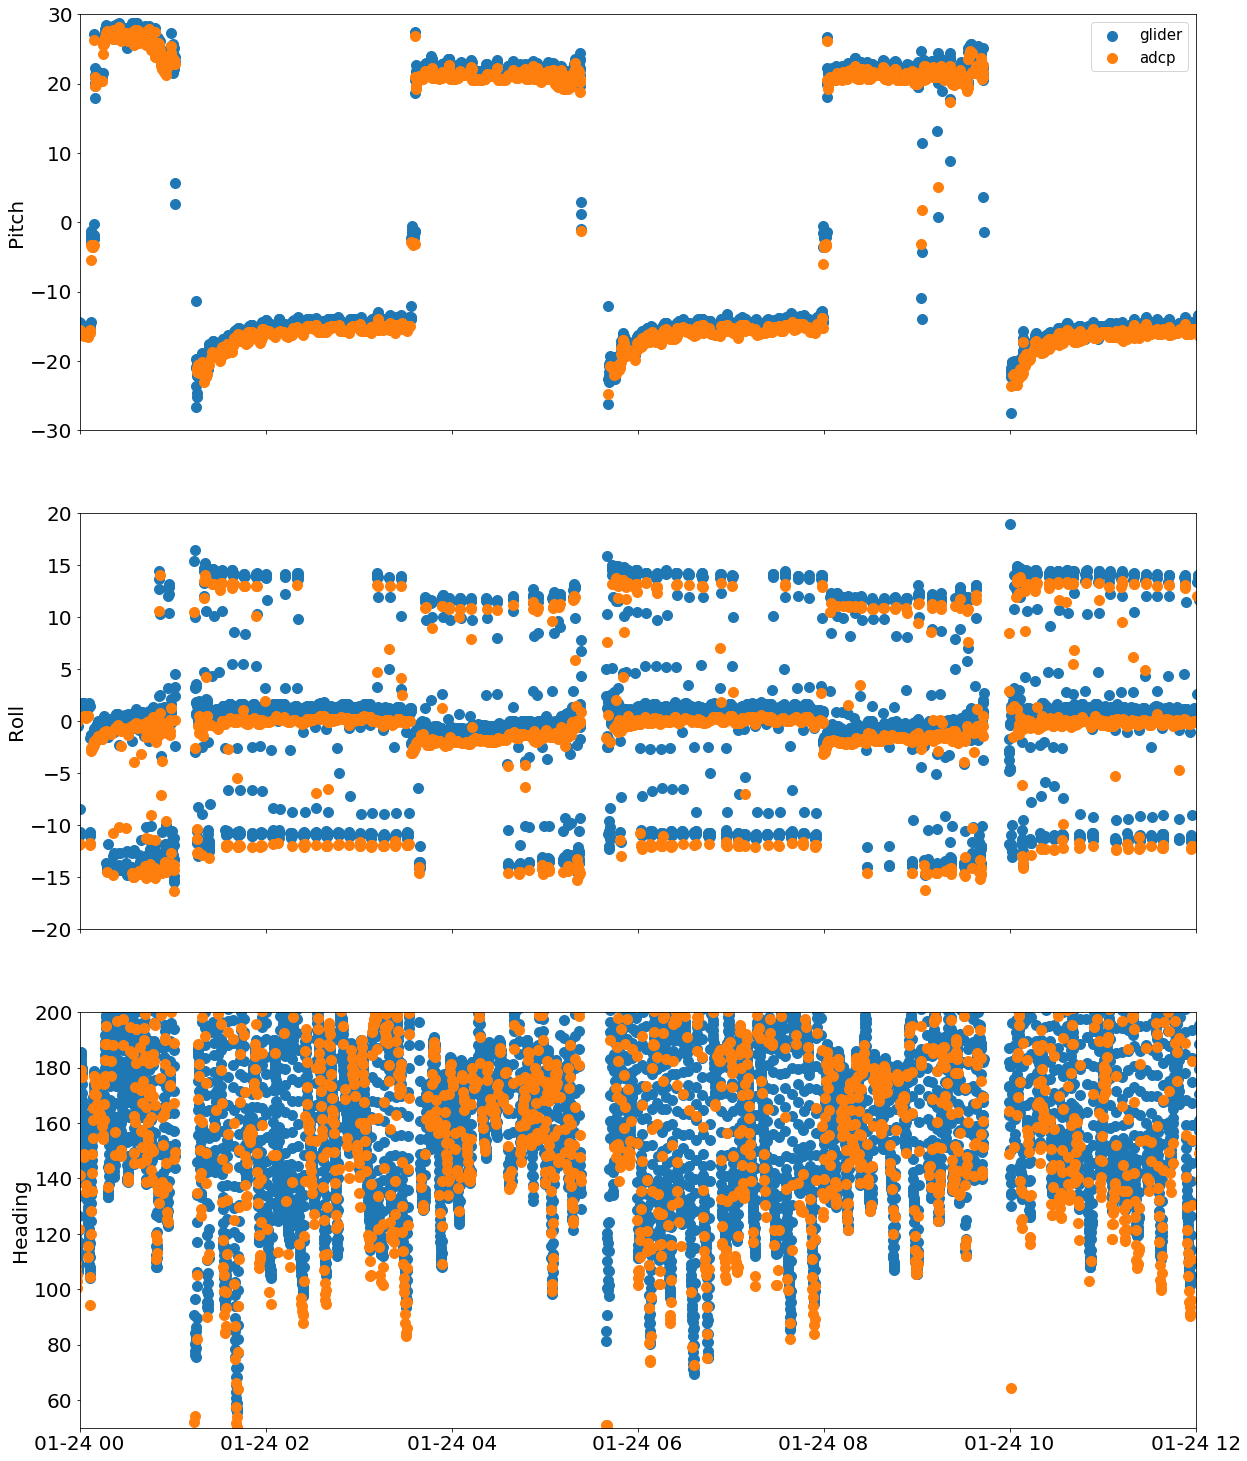

In [8]:
fig, ax = plt.subplots(3,1,figsize=(20,26), sharex=True)
ax = ax.ravel()
ax[0].scatter(glider_df.index, glider_df.pitch_gl, label='glider')
ax[0].scatter(adcp_df.index, adcp_df.pitch_ad, label='adcp')
ax[0].set(xlim=[datetime(2020,1,24,0), datetime(2020,1,24,12)], ylim=[-30,30], ylabel='Pitch')
ax[1].scatter(glider_df.index, glider_df.roll_gl)
ax[1].scatter(adcp_df.index, adcp_df.roll_ad)
ax[1].set(ylim=[-20,20], ylabel='Roll')
ax[2].scatter(glider_df.index, glider_df.heading_gl)
ax[2].scatter(adcp_df.index, adcp_df.heading_ad)
ax[2].set(ylim=[50,200], ylabel='Heading')
ax[0].legend();

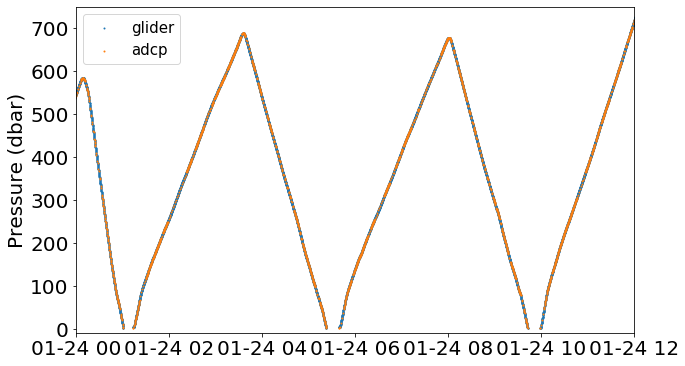

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(glider_df.index, glider_df.pressure_gl, label='glider', s=1)
ax.scatter(adcp_df.index, adcp_df.pressure_ad, label='adcp', s=1)
ax.set(xlim=[datetime(2020,1,24,0), datetime(2020,1,24,12)],ylim = [-10,750], ylabel='Pressure (dbar)')
ax.legend()

After 40 dives, the glider should be trimmed and on deep dives. we will use this as a sample dive to check coordinate transforms

In [10]:
foo = mission_dict['0041a']
bar = mission_dict['0041b']

Plot the xyz velocites from one dive cycle. Upper panel dive, lower panel climb

[(-0.4, 0.4), (-0.25, 0.0), Text(0.5, 0, 'w from pressure m/s')]

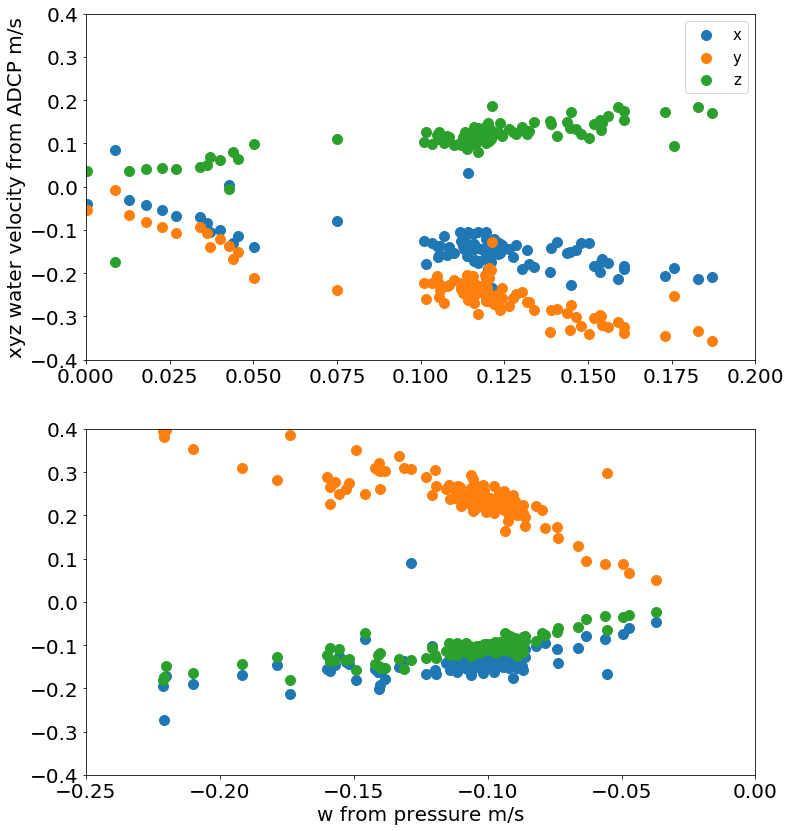

In [11]:
fig, ax = plt.subplots(2,1, figsize=(12,14), sharex=False)
ax = ax.ravel()
ax[0].scatter(-foo.glider_w_from_p,foo.vel_xyz[:,0,0][:-1], label='x')
ax[0].scatter(-foo.glider_w_from_p,foo.vel_xyz[:,0,1][:-1], label='y')
ax[0].scatter(-foo.glider_w_from_p,foo.vel_xyz[:,0,2][:-1], label='z')
ax[0].set(xlim=[0,0.2], ylim=[-0.4,0.4],ylabel='xyz water velocity from ADCP m/s')
ax[0].legend()
ax[1].scatter(-bar.glider_w_from_p,bar.vel_xyz[:,0,0][:-1], label='x')
ax[1].scatter(-bar.glider_w_from_p,bar.vel_xyz[:,0,1][:-1], label='y')
ax[1].scatter(-bar.glider_w_from_p,bar.vel_xyz[:,0,2][:-1], label='z')
ax[1].set(xlim=[-0.25,0.], ylim=[-0.4,0.4], xlabel='w from pressure m/s')

As above for enu velocites

[(-0.4, 0.4), (-0.25, 0.0), Text(0.5, 0, 'w from pressure m/s')]

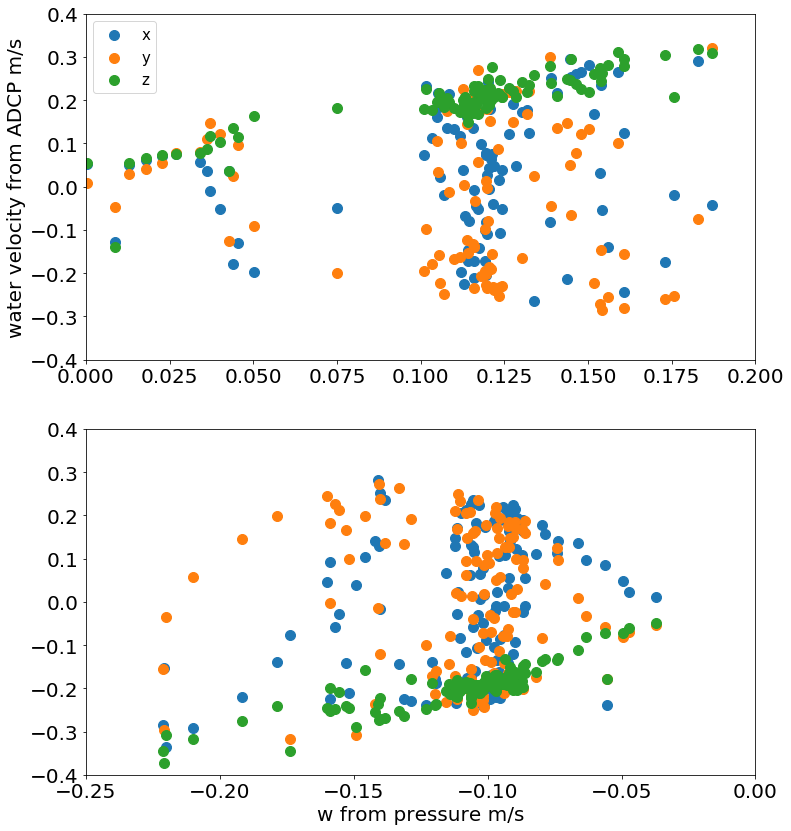

In [12]:
fig, ax = plt.subplots(2,1, figsize=(12,14), sharex=False)
ax = ax.ravel()
ax[0].scatter(-foo.glider_w_from_p,foo.vel_enu[:,0,0][:-1], label='x')
ax[0].scatter(-foo.glider_w_from_p,foo.vel_enu[:,0,1][:-1], label='y')
ax[0].scatter(-foo.glider_w_from_p,foo.vel_enu[:,0,2][:-1], label='z')
ax[0].set(xlim=[0,0.2], ylim=[-0.4,0.4],ylabel='water velocity from ADCP m/s')
ax[0].legend()
ax[1].scatter(-bar.glider_w_from_p,bar.vel_enu[:,0,0][:-1], label='x')
ax[1].scatter(-bar.glider_w_from_p,bar.vel_enu[:,0,1][:-1], label='y')
ax[1].scatter(-bar.glider_w_from_p,bar.vel_enu[:,0,2][:-1], label='z')
ax[1].set(xlim=[-0.25,0.], ylim=[-0.4,0.4], xlabel='w from pressure m/s')

In [13]:
all_the_shear = np.empty((len(mission_dict),100,3))
all_the_amp = np.empty((len(mission_dict),100,3))

in_bin = np.empty((len(mission_dict), 100))
for i, dive in enumerate(mission_dict.keys()):
    all_the_shear[i,:,:] = mission_dict[dive].vel_referenced
    in_bin[i,:] = mission_dict[dive].no_in_bin
    all_the_amp[i,:] = mission_dict[dive].amp_binned


In [14]:
np.shape(all_the_amp)

(310, 100, 3)

/home/callum/anaconda3/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


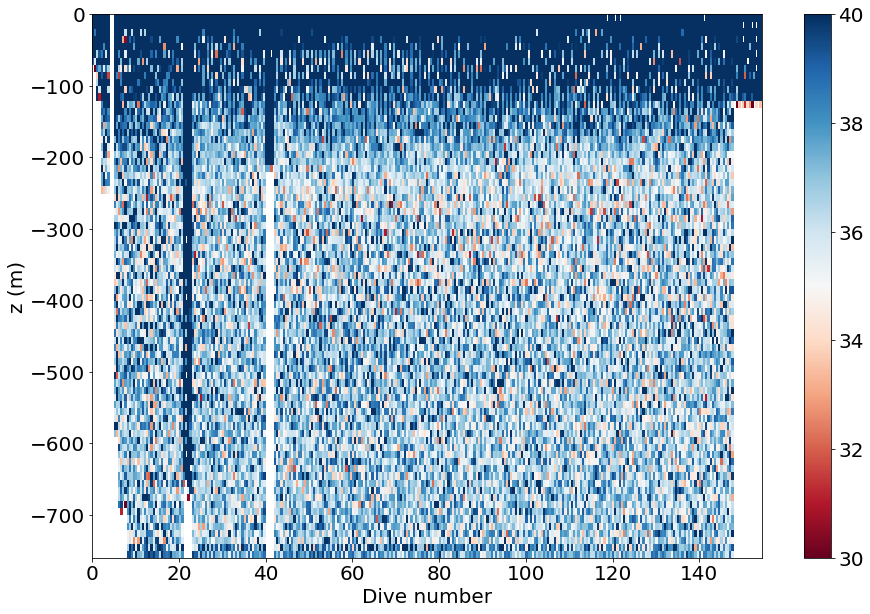

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
nos = ax.pcolor(np.arange(0,len(overview.index)/2,0.5), np.arange(-1000,10,10),np.transpose(np.nanmean(all_the_amp,2)),vmin=30, vmax=40, cmap='RdBu')
ax.set(ylim=[-760,0], ylabel='z (m)', xlabel='Dive number')
fig.colorbar(mappable=nos,ax=ax)

Check how many adcp velocity shear measurements were used in each cell of the velocity profile

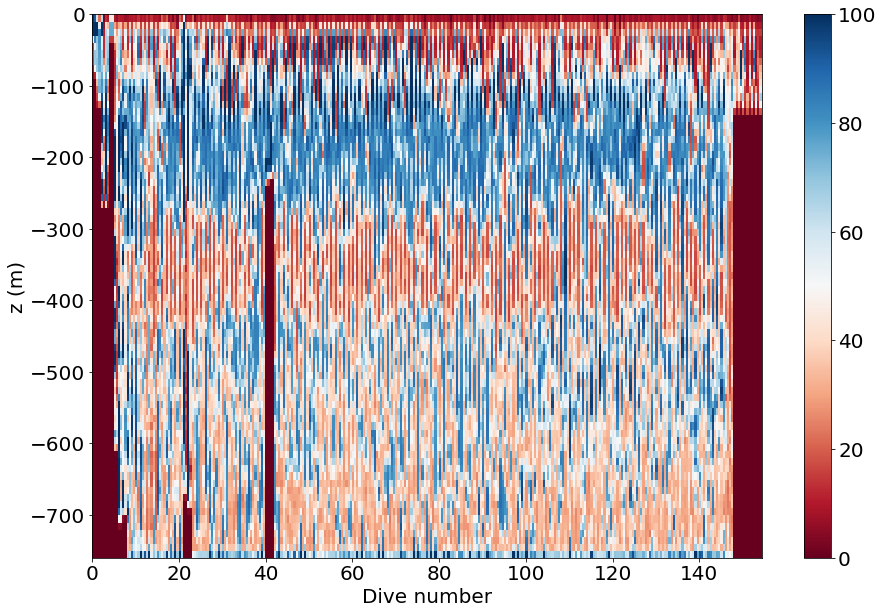

In [16]:
fig, ax = plt.subplots(figsize=(15,10))
nos = ax.pcolor(np.arange(0,len(overview.index)/2,0.5), np.arange(-1000,10,10),np.transpose(in_bin), vmin=0, vmax=100, cmap='RdBu')
ax.set(ylim=[-760,0], ylabel='z (m)', xlabel='Dive number')
fig.colorbar(mappable=nos,ax=ax)

Plot the shear profiles

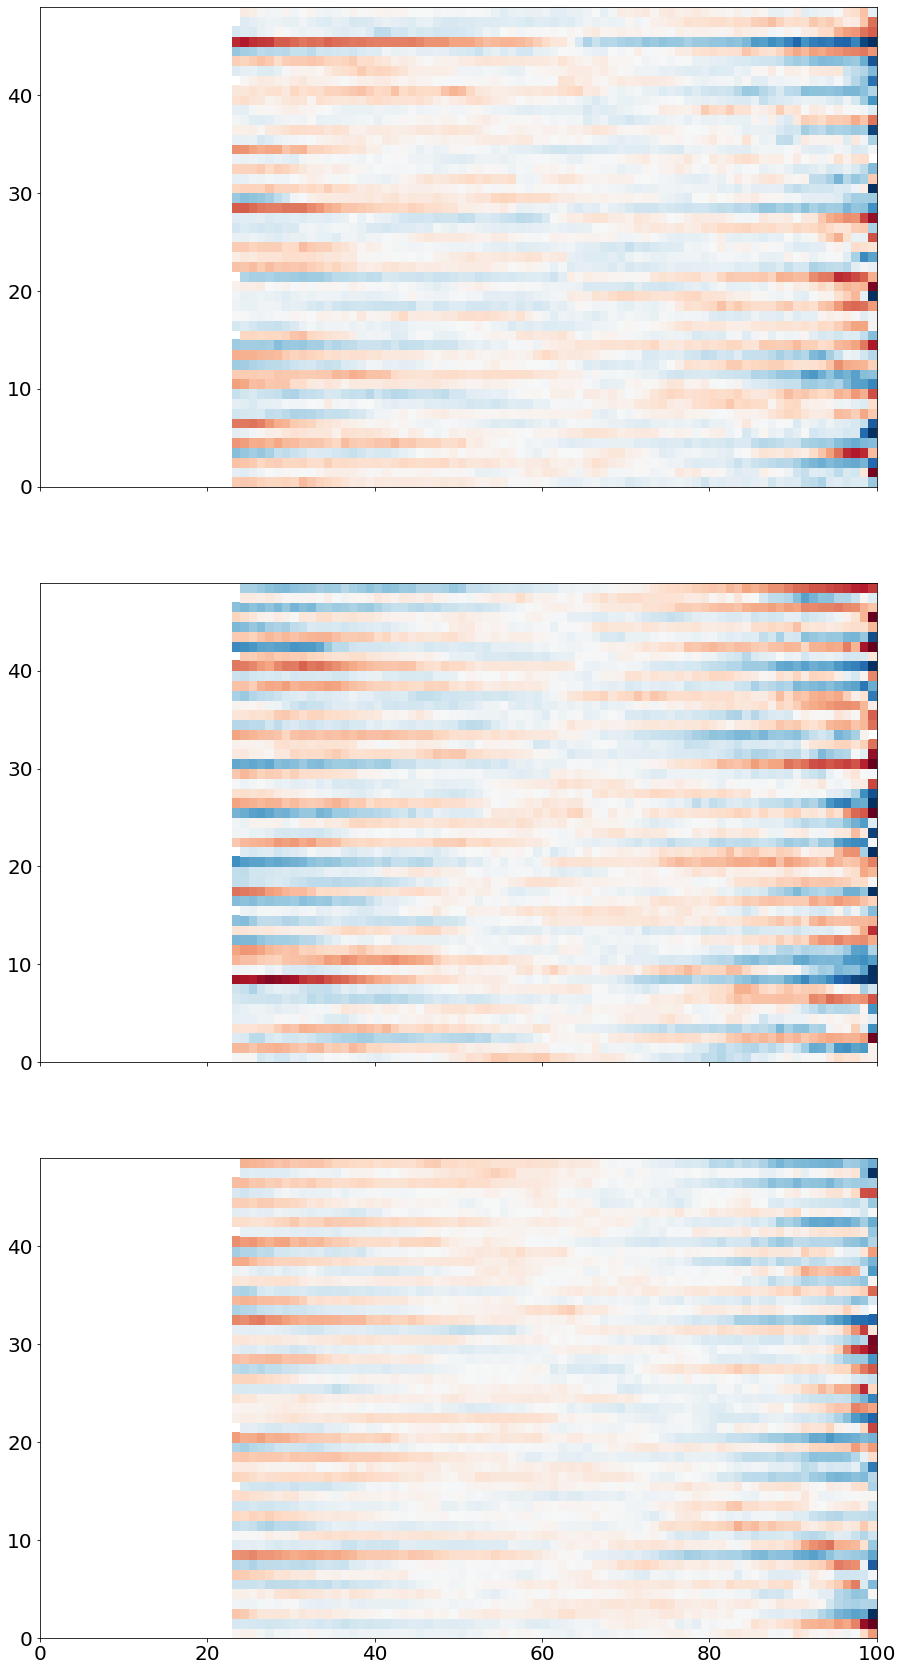

In [17]:
fig, ax = plt.subplots(3,1, figsize=(15,30), sharex=True)
ax = ax.ravel()
ax[0].pcolor(all_the_shear[101:150,:,0], cmap='RdBu_r', vmin=-0.5, vmax=0.5)
ax[1].pcolor(all_the_shear[101:150,:,1], cmap='RdBu_r', vmin=-0.5, vmax=0.5)
ax[2].pcolor(all_the_shear[101:150,:,2], cmap='RdBu_r', vmin=-0.5, vmax=0.5)